In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

In [4]:
# pip install --upgrade pandas

In [6]:
df = pd.read_csv(r"D:\Users\sandilya_garimella\Documents\Sandilya\Iris Dataset_Missing.csv")
df_new = pd.read_csv(r"D:\Users\sandilya_garimella\Documents\Sandilya\Iris Dataset.csv")

In [7]:
len(df)

150

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,NaN,setosa


In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Missing Values

In [10]:
df.isnull().sum()

sepal_length    4
sepal_width     2
petal_length    1
petal_width     5
species         2
dtype: int64

In [11]:
# Positions of Null values in data
df.loc[df['sepal_length'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width,species
22,NaN,3.6,1.0,0.2,setosa
46,NaN,3.8,1.6,0.2,setosa
101,NaN,2.7,5.1,1.9,virginica
124,NaN,3.3,5.7,2.1,virginica


In [12]:
# Dropping rows having Missing values
new_df = df.dropna(axis = 0, how ='any') 
new_df.shape

(136, 5)

In [13]:
# Dropping columns having Missing values more than 3
new_df = df.dropna(thresh=len(df)*(1-(3/len(df))),how='all',axis=1)
new_df.shape

(150, 3)

In [14]:
# Drop rows with any NaN in the selected columns only
df_sub = df.dropna(how='any', subset=['sepal_length', 'species'])
df_sub.shape

(144, 5)

Imputation

In [15]:
# Approach 2
from sklearn.impute import SimpleImputer

# Imputation
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(df.iloc[:,0:4].values)
df_imp = imp_mean.transform(df.iloc[:,0:4].values)
df_imp = pd.DataFrame(df_imp)
df_imp.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [16]:
df_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.200000
1,4.9,3.0,1.4,0.200000
2,4.7,3.2,1.3,0.200000
3,4.6,3.1,1.5,0.200000
4,5.0,3.6,1.4,1.191724


In [17]:
# Approach 3
# Make copy to avoid changing original data (when imputing)
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
df_plus = df.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    df_plus[col + '_was_missing'] = df_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
df_plus.drop(['species', 'species_was_missing'], axis  = 1, inplace = True)
imputed_df_plus = pd.DataFrame(my_imputer.fit_transform(df_plus.values))

In [18]:
imputed_df_plus.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.200000,0.0,0.0,0.0,0.0
1,4.9,3.0,1.4,0.200000,0.0,0.0,0.0,0.0
2,4.7,3.2,1.3,0.200000,0.0,0.0,0.0,0.0
3,4.6,3.1,1.5,0.200000,0.0,0.0,0.0,0.0
4,5.0,3.6,1.4,1.191724,0.0,0.0,0.0,1.0


# Categorical Variables

In [19]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

n = (df.dtypes != 'object')
num_cols = list(n[n].index)

print("Numerical variables:")
print(num_cols)

Categorical variables:
['species']
Numerical variables:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [20]:
drop_df = df.select_dtypes(exclude=['object'])
drop_df.shape

(150, 4)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_df = df_new.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
#     label_encoder.fit(df[col])
    label_df[col] = label_encoder.fit_transform(df_new[col])

In [22]:
label_df['species'].unique()

array([0, 1, 2], dtype=int64)

In [23]:
from sklearn.preprocessing import OneHotEncoder
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_df = pd.DataFrame(OH_encoder.fit_transform(df_new[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_df.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_df = df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_df = pd.concat([num_df, OH_cols_df], axis=1)

In [24]:
OH_df = OH_df.rename({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, axis=1)

In [25]:
OH_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0


# Pipelines

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

y = df_new.sepal_length
y = pd.DataFrame(y)
y.columns = ['sepal_length']
df_upd = df_new.drop(['sepal_length'], axis=1)

s = (df_upd.dtypes == 'object')
object_cols = list(s[s].index)

n = (df_upd.dtypes != 'object')
num_cols = list(n[n].index)


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, object_cols)
    ])

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)

In [38]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
# my_pipeline = make_pipeline(preprocessor, model)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Splitting data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_upd, y ,test_size=0.33, random_state=42)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE:', score)

MAE: 0.30133333333333345


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


# Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

MAE scores:
 [0.16033333 0.13333333 0.215      0.291      0.323      0.29733333
 0.369      0.26266667 0.235      0.45433333]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [40]:
from xgboost import XGBRegressor

In [41]:
from sklearn.preprocessing import LabelEncoder
X_train_label = X_train.copy()
X_test_label = X_test.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
#     label_encoder.fit(df[col])
    X_train_label[col] = label_encoder.fit_transform(X_train_label[col])
    X_test_label[col] = label_encoder.fit_transform(X_test_label[col])
    
my_model = XGBRegressor()
my_model.fit(X_train_label, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [42]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test_label)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.30310473442077646


MICE:

In [61]:
import sklearn
sklearn.__version__

'0.21.3'

In [62]:
from sklearn.experimental import enable_iterative_imputer

In [63]:
from sklearn.impute import IterativeImputer

In [64]:
df = pd.DataFrame({
    'age': [25,27,29,31,33,np.nan],
    'experience': [np.nan, 3,5,7,9,11],
    'salary': [50, np.nan, 110,140,170,200],
    'purchased' : [0,1,1,0,1,0]
})
df

,age,experience,salary,purchased
0,25.0,NaN,50.0,0
1,27.0,3.0,NaN,1
2,29.0,5.0,110.0,1
3,31.0,7.0,140.0,0
4,33.0,9.0,170.0,1
5,NaN,11.0,200.0,0


In [70]:
X = df.drop('purchased', 1)
y = df['purchased']

In [71]:
X

,age,experience,salary
0,25.0,NaN,50.0
1,27.0,3.0,NaN
2,29.0,5.0,110.0
3,31.0,7.0,140.0
4,33.0,9.0,170.0
5,NaN,11.0,200.0


In [72]:
X.corr()

,age,experience,salary
age,1.0,1.0,1.0
experience,1.0,1.0,1.0
salary,1.0,1.0,1.0


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
df_new.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [45]:
dfn= df_new.drop(['species'], axis=1)

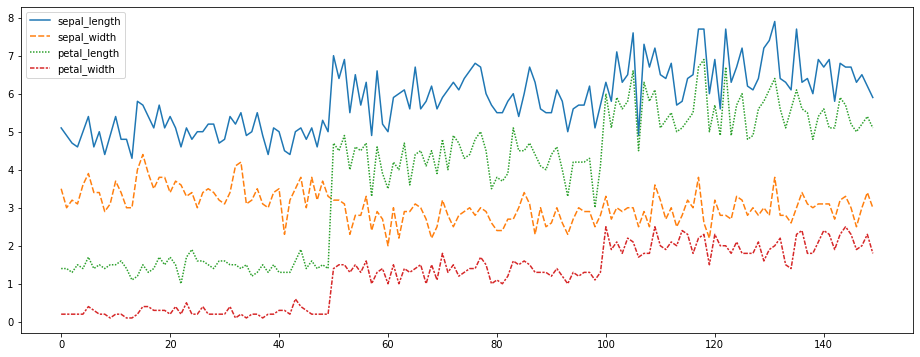

In [46]:
plt.figure(figsize=(16,6))

sns.lineplot(data=dfn)

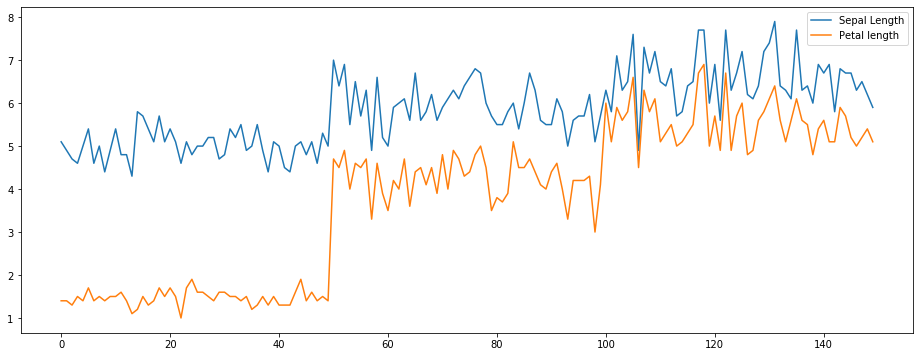

In [47]:
plt.figure(figsize=(16,6))
sns.lineplot(data=dfn['sepal_length'], label="Sepal Length")
sns.lineplot(data=dfn['petal_length'], label="Petal length")


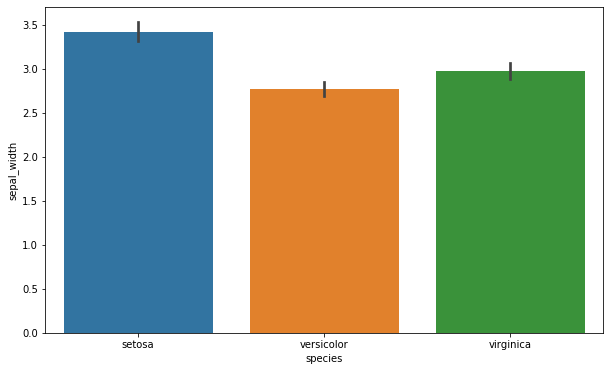

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_new['species'], y=df_new['sepal_width'])

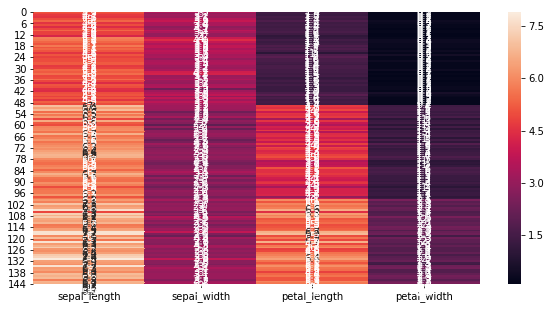

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(data=dfn, annot=True)

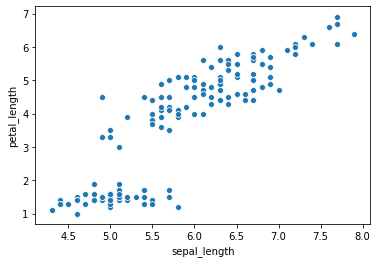

In [50]:
sns.scatterplot(x=dfn['sepal_length'], y=dfn['petal_length'])

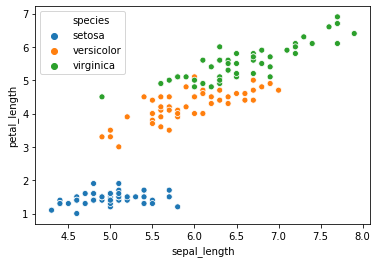

In [51]:
sns.scatterplot(x=df_new['sepal_length'], y=df_new['petal_length'], hue=df_new['species'])

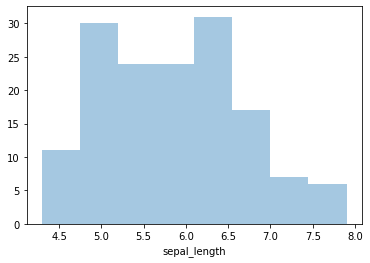

In [52]:
# Histogram 
sns.distplot(a=dfn['sepal_length'], kde=False)

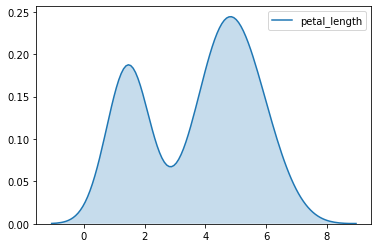

In [53]:
# KDE plot 
sns.kdeplot(data=dfn['petal_length'], shade=True)

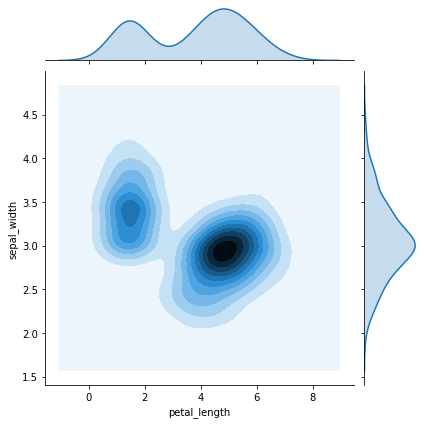

In [54]:
# 2D KDE plot
sns.jointplot(x=dfn['petal_length'], y=dfn['sepal_width'], kind="kde")